In [1]:
import json
import pandas as pd
import requests
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')

In [2]:
# Criar uma função que lê o arquivo .json
def ler_json(arq_json):
    with open(arq_json, 'r', encoding='utf8') as f:
        return json.load(f)

# Ler o arquivo .json e jogar na variável 'data'
data = ler_json('credentials.json')

credentials = data['id']

# Defina a URL da API que será consultada
url = "https://dadosabertos.aneel.gov.br/api/action/datastore_search?resource_id=" + credentials + "&limit=1000000"

# Defina o tempo máximo de espera para a resposta da requisição
timeout_seconds = 100   

# Crie uma função para obter os dados da API e retornar um DataFrame
def get_data(url, timeout_seconds):
    try:
        # Faça uma requisição GET para a URL especificada, com o tempo limite definido
        response = requests.get(url, timeout=timeout_seconds)

        # Verifique se houve algum erro na resposta HTTP
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        # Se houve algum erro na requisição, imprima o erro e retorne None
        print("Erro ao obter os dados:", e)
        return None

    # Verifique se o código de status da resposta HTTP é 200, indicando que a requisição foi bem sucedida
    if response.status_code == 200:
        # Se a resposta foi bem sucedida, obtenha os dados em formato JSON
        data = response.json()

        # Imprima uma mensagem de sucesso
        print("Requisição bem sucedida")

        # Verifique se a API retornou dados
        if data["success"]:
            # Se a API retornou dados, obtenha a lista de registros e a lista de colunas
            records = data["result"]["records"]
            columns = data["result"]["fields"]

            # Adicione as colunas "SigUF", "Bandeira" e "Nome_agente" na lista de colunas
            columns.append({"id": "Bandeira", "type": "text"})
            columns.append({"id": "Nome_agente", "type": "text"})

            # Crie um DataFrame a partir das listas de registros e colunas
            df = pd.DataFrame.from_records(records, columns=[c["id"] for c in columns])

            # Retorne o DataFrame criado
            return df
        else:
            # Se a API não retornou dados, imprima uma mensagem de aviso e retorne None
            print("A API não retornou dados.")
            return None
    else:
        # Se o código de status da resposta HTTP for diferente de 200, trate o erro de acordo com o código
        if response.status_code == 400:
            print("Requisição mal formada.")
        elif response.status_code == 401:
            print("Não autorizado.")
        elif response.status_code == 403:
            print("Acesso proibido.")
        elif response.status_code == 404:
            print("Recurso não encontrado.") 
        elif response.status_code == 500:
            print("Erro interno do servidor.")
        else:
            print("Erro desconhecido ao obter os dados.")

        # Retorne None em caso de erro
        return None

# Chame a função get_data para obter um DataFrame com os dados da API
df = get_data(url, timeout_seconds)

Requisição bem sucedida


Visualizar os dados

In [3]:
# criar copia

df_ = df.copy()
df_.head()

,_id,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,...,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub,Bandeira,Nome_agente
0,1,2023-03-27,03/2023,33050196000188,CPFL-PAULISTA,COMPANHIA PAULISTA DE FORÇA E LUZ,1,Residencial,9,B1,...,Radiação solar,Microgeracao,"3,30",None,None,None,None,None,NaN,NaN
1,2,2023-03-27,03/2023,04895728000180,Equatorial PA,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,1,Residencial,9,B1,...,Radiação solar,Microgeracao,"3,60",None,None,None,None,None,NaN,NaN
2,3,2023-03-27,03/2023,04895728000180,Equatorial PA,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,1,Residencial,9,B1,...,Radiação solar,Microgeracao,"3,75",None,None,None,None,None,NaN,NaN
3,4,2023-03-27,03/2023,04065033000170,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,...,Radiação solar,Microgeracao,"32,50","-67,85","-9,96",None,None,None,NaN,NaN
4,5,2023-03-27,03/2023,04065033000170,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,...,Radiação solar,Microgeracao,"4,00","-70,78","-8,15",None,None,None,NaN,NaN


In [4]:
# tamanho do dataframe

df_.shape

(32000, 36)

In [5]:
# valores nulos por coluna

dados_nulos = df_.isnull().sum()
dados_nulos = pd.DataFrame(dados_nulos)
dados_nulos

,0
_id,0
DatGeracaoConjuntoDados,0
AnmPeriodoReferencia,0
NumCNPJDistribuidora,0
SigAgente,0
NomAgente,0
CodClasseConsumo,0
DscClasseConsumo,0
CodSubGrupoTarifario,0
DscSubGrupoTarifario,0


In [6]:
# percebeu-se que existem muitos valores nulos, em algumas colunas chega até a 90%, então deverá ser excluídas, e dropar colunas que não fazem sentido está no dataframe

df_ = df_.drop(columns=['_id','NumCoordNEmpreendimento', 'NumCoordEEmpreendimento', 'NomSubEstacao', 'NumCoordESub', 'NumCoordNSub', 'Bandeira', 'Nome_agente'])

1. Agregar os dados em base mensal:

In [7]:
df_.columns

Index(['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia',
       'NumCNPJDistribuidora', 'SigAgente', 'NomAgente', 'CodClasseConsumo',
       'DscClasseConsumo', 'CodSubGrupoTarifario', 'DscSubGrupoTarifario',
       'codUFibge', 'SigUF', 'codRegiao', 'NomRegiao', 'CodMunicipioIbge',
       'NomMunicipio', 'CodCEP', 'SigTipoConsumidor', 'NumCPFCNPJ',
       'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'DthAtualizaCadastralEmpreend', 'SigModalidadeEmpreendimento',
       'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
       'DscFonteGeracao', 'DscPorte', 'MdaPotenciaInstaladaKW'],
      dtype='object')

1.1 Opção 1: Elaboração de um gráfico mostrando a evolução temporal do Total Mensal de Empreendimentos por Estado e por Classe de Consumo;

In [8]:
TemporalEmp = df_[['DthAtualizaCadastralEmpreend', 'SigUF', 'NumCPFCNPJ', 'DscClasseConsumo']]
TemporalEmp['DthAtualizaCadastralEmpreend'] = pd.to_datetime(TemporalEmp['DthAtualizaCadastralEmpreend'])
TemporalEmp['mes_ano'] = TemporalEmp['DthAtualizaCadastralEmpreend'].dt.strftime('%m/%Y')
TemporalEmp = TemporalEmp.drop(columns=['DthAtualizaCadastralEmpreend'])

TemporalEmp_group = TemporalEmp.groupby(['mes_ano','DscClasseConsumo','SigUF']).count().reset_index().sort_values(by='mes_ano')

In [9]:
TemporalEmp_group['DscClasseConsumo'].unique()

array(['Comercial', 'Residencial', 'Industrial', 'Rural',
       'Serviço Público', 'Poder Público'], dtype=object)

In [10]:
#função para gerar dados para o gráfico

def gerar_grafico(ClasseConsumo):

    TemporalEmp_filter = TemporalEmp_group[TemporalEmp_group['DscClasseConsumo'] == ClasseConsumo]
    TemporalEmp_pivot = TemporalEmp_filter.pivot(index='mes_ano', columns=['SigUF'], values='NumCPFCNPJ')
    TemporalEmp_pivot.replace(np.nan,0, inplace=True)
    TemporalEmp_pivot = TemporalEmp_pivot.reset_index()
    TemporalEmp_pivot['mes_ano'] = pd.to_datetime(TemporalEmp_pivot['mes_ano'])
    #TemporalEmp_pivot = TemporalEmp_pivot[TemporalEmp_pivot['mes_ano'] >= '2019-01-01'] 
    TemporalEmp_pivot = TemporalEmp_pivot.sort_values(by='mes_ano')
    TemporalEmp_pivot = TemporalEmp_pivot.set_index('mes_ano')
    
    return TemporalEmp_pivot

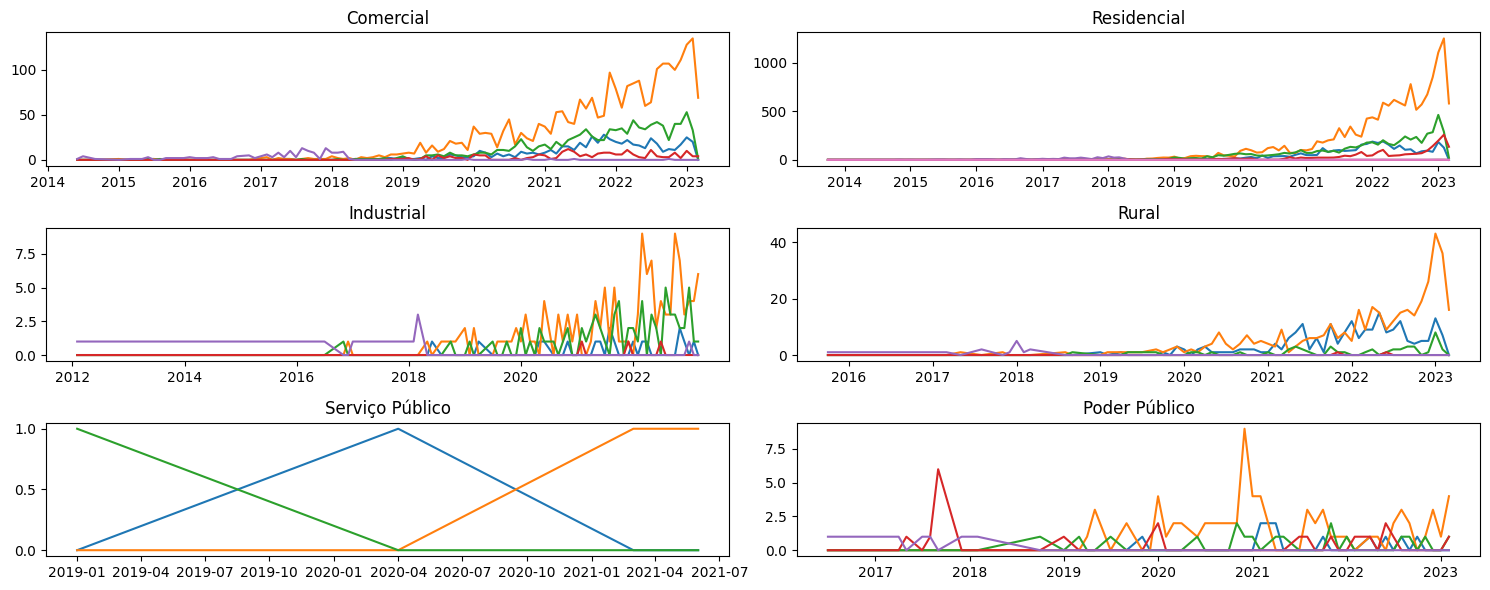

In [11]:
# Plotar o primeiro gráfico no primeiro subplot

# Criar uma figura com 2 linhas e 2 colunas de subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 6))

# Plotar o primeiro gráfico no primeiro subplot
axs[0, 0].plot(gerar_grafico('Comercial'))
axs[0, 0].set_title('Comercial')

# Plotar o segundo gráfico no segundo subplot
axs[0, 1].plot(gerar_grafico('Residencial'))
axs[0, 1].set_title('Residencial')

# Plotar o terceiro gráfico no terceiro subplot
axs[1, 0].plot(gerar_grafico('Industrial'))
axs[1, 0].set_title('Industrial')

# Plotar o quarto gráfico no quarto subplot
axs[1, 1].plot(gerar_grafico('Rural'))
axs[1, 1].set_title('Rural')

axs[2, 0].plot(gerar_grafico('Serviço Público'))
axs[2, 0].set_title('Serviço Público')

axs[2, 1].plot(gerar_grafico('Poder Público'))
axs[2, 1].set_title('Poder Público')

# Ajustar a distância entre os subplots
fig.tight_layout()

# Mostrar a figura
plt.show()

1.2 Opção 2: Elaboração de um gráfico mostrando a evolução temporal da Potência Instalada Total (KW) por Estado

In [12]:
TemporalPotInst = df_[['DthAtualizaCadastralEmpreend', 'SigUF', 'MdaPotenciaInstaladaKW']]

TemporalPotInst['DthAtualizaCadastralEmpreend'] = pd.to_datetime(TemporalPotInst['DthAtualizaCadastralEmpreend'])
TemporalPotInst['mes_ano'] = TemporalPotInst['DthAtualizaCadastralEmpreend'].dt.strftime('%m/%Y')
TemporalPotInst = TemporalPotInst.drop(columns=['DthAtualizaCadastralEmpreend'])

TemporalPotInst_group = TemporalPotInst.groupby(['mes_ano','SigUF']).count().reset_index().sort_values(by='mes_ano')


In [13]:
TemporalPotInst_group['SigUF'].unique()

array(['AL', 'BA', 'AP', 'AM', 'AC', 'SP', 'PA'], dtype=object)

In [14]:
#função para gerar dados para o gráfico

def gerar_grafico_Potencial(uf):

    TemporalPotInst_filter = TemporalPotInst_group[TemporalPotInst_group['SigUF'] == uf]
    TemporalPotInst_pivot = TemporalPotInst_filter.pivot(index='mes_ano', columns=['SigUF'], values='MdaPotenciaInstaladaKW')
    TemporalPotInst_pivot.replace(np.nan,0, inplace=True)
    TemporalPotInst_pivot = TemporalPotInst_pivot.reset_index()
    TemporalPotInst_pivot['mes_ano'] = pd.to_datetime(TemporalPotInst_pivot['mes_ano'])
    #TemporalPotInst_pivot = TemporalPotInst_pivot[TemporalPotInst_pivot['mes_ano'] >= '2019-01-01'] 
    TemporalPotInst_pivot = TemporalPotInst_pivot.sort_values(by='mes_ano')
    TemporalPotInst_pivot = TemporalPotInst_pivot.set_index('mes_ano')

    return TemporalPotInst_pivot

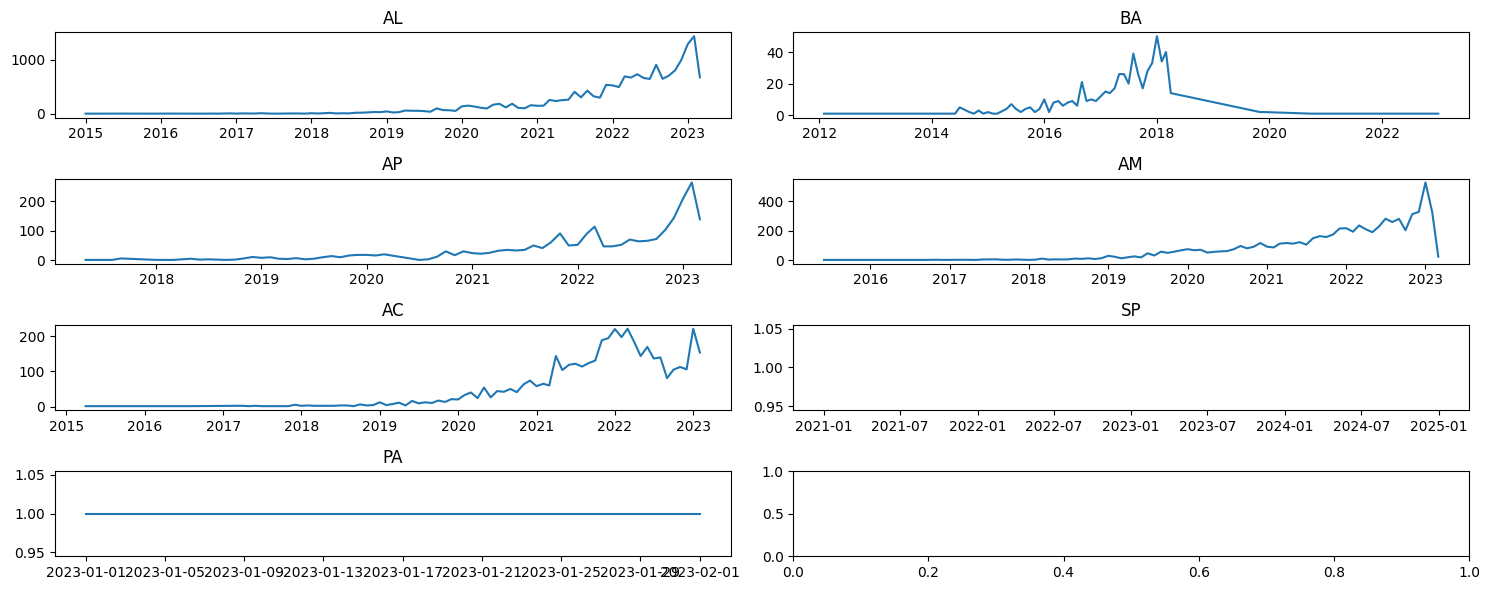

In [15]:
# Plotar o primeiro gráfico no primeiro subplot

# Criar uma figura com 2 linhas e 2 colunas de subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 6))

# Plotar o primeiro gráfico no primeiro subplot
axs[0, 0].plot(gerar_grafico_Potencial('AL'))
axs[0, 0].set_title('AL')

# Plotar o segundo gráfico no segundo subplot
axs[0, 1].plot(gerar_grafico_Potencial('BA'))
axs[0, 1].set_title('BA')

# Plotar o terceiro gráfico no terceiro subplot
axs[1, 0].plot(gerar_grafico_Potencial('AP'))
axs[1, 0].set_title('AP')

# Plotar o quarto gráfico no quarto subplot
axs[1, 1].plot(gerar_grafico_Potencial('AM'))
axs[1, 1].set_title('AM')

axs[2, 0].plot(gerar_grafico_Potencial('AC'))
axs[2, 0].set_title('AC')

axs[2, 1].plot(gerar_grafico_Potencial('SP'))
axs[2, 1].set_title('SP')

axs[3, 0].plot(gerar_grafico_Potencial('PA'))
axs[3, 0].set_title('PA')

# Ajustar a distância entre os subplots
fig.tight_layout()

# Mostrar a figura
plt.show()

1.3 Criando previsões